# Uploading Data

In [1]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r'C:\Users\Asad Ameen\Desktop\docxtpl\reports\Machine_Learning\Restaurant reviews.csv')

# Get summary statistics for numerical columns (Pictures)
numerical_summary = df[['Pictures']].describe()

# Display summary statistics and data types
print("Summary Statistics:")
numerical_summary

Summary Statistics:


,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# Data Preparation

In [2]:
# Get data types of all columns
data_types = df.dtypes

print("\nData Types:")
data_types


Data Types:


Restaurant     object
Reviewer       object
Review         object
Rating         object
Metadata       object
Time           object
Pictures        int64
7514          float64
dtype: object

In [3]:
# Display the first few rows of the dataset
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
# Drop a column ('7514')
df = df.drop('7514', axis=1)

In [5]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


# Data Cleaning

In [6]:
# Check for missing values in specific columns
missing_values = df[['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']].isnull().sum()

# Display the count of missing values for each column
print("Missing Values Count:")
missing_values

Missing Values Count:


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [7]:
# Find rows with any missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]

# Calculate the number of missing values in each row
missing_values_count = rows_with_missing_values.isnull().sum(axis=1)

# Display the rows with any missing values and the distribution of missing values
print("Rows with Any Missing Values:")
print(rows_with_missing_values)

print("\nDistribution of Missing Values in Rows:")
print(missing_values_count)

Rows with Any Missing Values:
               Restaurant                Reviewer Review Rating  \
2360                 Amul        Lakshmi Narayana    NaN      5   
5799         Being Hungry                   Surya    NaN      5   
6449      Hyderabad Chefs          Madhurimanne97    NaN      5   
6489      Hyderabad Chefs                  Harsha    NaN      5   
7954         Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228   Al Saba Restaurant                  Suresh    NaN      5   
8777  American Wild Wings                     NaN    NaN    NaN   
8778  American Wild Wings                     NaN    NaN    NaN   
8779  American Wild Wings                     NaN    NaN    NaN   
8780  American Wild Wings                     NaN    NaN    NaN   
8781  American Wild Wings                     NaN    NaN    NaN   
8782  American Wild Wings                     NaN    NaN    NaN   
8783  American Wild Wings                     NaN    NaN    NaN   
8784  American Wild Wings       

In [8]:
# Find rows with missing values in 'Review' and 'Rating' columns
rows_with_missing_review_and_rating = df[df[['Review', 'Rating']].isnull().all(axis=1)]

# Calculate the count of such rows
count_missing_review_and_rating = len(rows_with_missing_review_and_rating)

# Display the count of rows with missing values in 'Review' and 'Rating' columns
print("Number of Rows with Missing Values in 'Review' and 'Rating' columns:", count_missing_review_and_rating)

Number of Rows with Missing Values in 'Review' and 'Rating' columns: 38


In [9]:
# Drop rows with missing values in 'Review' and 'Rating' columns
df1 = df.dropna(subset=['Review', 'Rating'])

# Display the cleaned DataFrame without missing values
print("DataFrame without Missing Values in 'Review' and 'Rating' columns:")
df1

DataFrame without Missing Values in 'Review' and 'Rating' columns:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [10]:
# Check for missing values in the cleaned DataFrame
missing_values = df1.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Count in Cleaned DataFrame:")
print(missing_values)

Missing Values Count in Cleaned DataFrame:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [11]:
# Get the number of rows in the DataFrame
num_rows = df1.shape[0]

# Print the number of rows
print("Number of Rows in the DataFrame:", num_rows)

Number of Rows in the DataFrame: 9955


# Feature Engineering

In [12]:
# Calculate word count for each review
df1['Review_Word_Count'] = df1['Review'].apply(lambda x: len(str(x).split()))

# Display the updated DataFrame
print(df1[['Review', 'Review_Word_Count']])
df1

                                                 Review  Review_Word_Count
0     The ambience was good, food was quite good . h...                 41
1     Ambience is too good for a pleasant evening. S...                 27
2     A must try.. great food great ambience. Thnx f...                 31
3     Soumen das and Arun was a great guy. Only beca...                 28
4     Food is good.we ordered Kodi drumsticks and ba...                 27
...                                                 ...                ...
9995  Madhumathi Mahajan Well to start with nice cou...                192
9996  This place has never disappointed us.. The foo...                 52
9997  Bad rating is mainly because of "Chicken Bone ...                280
9998  I personally love and prefer Chinese Food. Had...                 88
9999  Checked in here to try some delicious chinese ...                 87

[9955 rows x 2 columns]


C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_11516\1723472367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review_Word_Count'] = df1['Review'].apply(lambda x: len(str(x).split()))


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,41
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,27
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,31
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,28
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,27
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,192
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,52
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,280
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,88


In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon data
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores for a text
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply the sentiment analysis function to the 'Review' column and create new columns for sentiment scores
sentiments = df1['Review'].apply(get_sentiment_scores)
sentiment_df = pd.DataFrame(list(sentiments))

# Reset the index of both DataFrames
df1.reset_index(drop=True, inplace=True)
sentiment_df.reset_index(drop=True, inplace=True)

# Concatenate the two DataFrames with ignore_index=True
df2 = pd.concat([df1, sentiment_df], axis=1, ignore_index=True)

# Set the column names to preserve the original names
# Replace 'new_col_name' with your actual column names
df2.columns = df1.columns.tolist() + sentiment_df.columns.tolist()

# # Concatenate the sentiment scores DataFrame with the original DataFrame
# df2 = pd.concat([df1, sentiment_df], axis=1)

# Display the updated DataFrame with sentiment scores
df2

[nltk_data] Downloading package vader_lexicon to C:\Users\Asad
[nltk_data]     Ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,41,0.000,0.582,0.418,0.9664
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,27,0.000,0.554,0.446,0.9360
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,31,0.000,0.692,0.308,0.9186
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,28,0.000,0.708,0.292,0.8591
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,27,0.000,0.609,0.391,0.9201
...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,192,0.028,0.728,0.244,0.9923
9951,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,52,0.000,0.704,0.296,0.9579
9952,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,280,0.050,0.806,0.143,0.9785
9953,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,88,0.022,0.811,0.167,0.9359


In [14]:
# Convert 'Time' column to datetime
df2['Time'] = pd.to_datetime(df2['Time'])

# Extract additional features
df2['Year'] = df2['Time'].dt.year
df2['Month'] = df2['Time'].dt.month
df2['Day'] = df2['Time'].dt.day
df2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound,Year,Month,Day
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,0.418,0.9664,2019,5,25
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,0.446,0.9360,2019,5,25
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,0.308,0.9186,2019,5,24
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,0.292,0.8591,2019,5,24
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,0.391,0.9201,2019,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,0.244,0.9923,2016,6,5
9951,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,52,0.000,0.704,0.296,0.9579,2016,6,4
9952,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,280,0.050,0.806,0.143,0.9785,2016,6,3
9953,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,88,0.022,0.811,0.167,0.9359,2016,5,31


In [15]:
# Create a new column 'DayOfWeek' that stores the day of the week (0 = Monday, 6 = Sunday)
df2['DayOfWeek'] = df2['Time'].dt.dayofweek

# Map the numerical day of the week to its corresponding name (e.g., 0 = 'Monday')
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df2['DayOfWeek'] = df2['DayOfWeek'].map(day_mapping)
df2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound,Year,Month,Day,DayOfWeek
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,0.418,0.9664,2019,5,25,Saturday
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,0.446,0.9360,2019,5,25,Saturday
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,0.308,0.9186,2019,5,24,Friday
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,0.292,0.8591,2019,5,24,Friday
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,0.391,0.9201,2019,5,24,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,0.244,0.9923,2016,6,5,Sunday
9951,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,52,0.000,0.704,0.296,0.9579,2016,6,4,Saturday
9952,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,280,0.050,0.806,0.143,0.9785,2016,6,3,Friday
9953,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,88,0.022,0.811,0.167,0.9359,2016,5,31,Tuesday


In [16]:
# Extract the number of reviews and followers using regular expressions
metadata_extracted = df2['Metadata'].str.extract(r'(\d+) Reviews , (\d+) Followers')

# Fill NaN values with 0 (assuming missing values indicate zero reviews/followers)
metadata_extracted = metadata_extracted.fillna('0')

# Convert the extracted values to integers
df2['ReviewCount'] = metadata_extracted[0].astype(int)
df2['FollowerCount'] = metadata_extracted[1].astype(int)
df2

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound,Year,Month,Day,DayOfWeek,ReviewCount,FollowerCount
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,0.418,0.9664,2019,5,25,Saturday,0,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,0.446,0.9360,2019,5,25,Saturday,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,0.308,0.9186,2019,5,24,Friday,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,0.292,0.8591,2019,5,24,Friday,0,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,0.391,0.9201,2019,5,24,Friday,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,0.244,0.9923,2016,6,5,Sunday,53,54
9951,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,52,0.000,0.704,0.296,0.9579,2016,6,4,Saturday,2,53
9952,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,280,0.050,0.806,0.143,0.9785,2016,6,3,Friday,65,423
9953,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,88,0.022,0.811,0.167,0.9359,2016,5,31,Tuesday,13,144


In [17]:
# Convert 'Rating' to a numerical data type (float)
df3 = df2
# Remove rows with non-numeric values in the 'Rating' column
df3 = df3[df3['Rating'].apply(lambda x: x.isnumeric())]

# Convert the 'Rating' column to a numeric data type (float)
df3['Rating'] = df3['Rating'].astype(float)

# Calculate the average rating for each restaurant
average_ratings = df3.groupby('Restaurant')['Rating'].mean().reset_index()
average_ratings.rename(columns={'Rating': 'Average_Rating'}, inplace=True)

# Merge the average ratings back to the original DataFrame
df3 = pd.merge(df3, average_ratings, on='Restaurant')

# Display the DataFrame with the new 'Avg_Rating' column
df3

C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_11516\852872693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rating'] = df3['Rating'].astype(float)


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound,Year,Month,Day,DayOfWeek,ReviewCount,FollowerCount,Average_Rating
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,0.418,0.9664,2019,5,25,Saturday,0,0,4.280000
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,0.446,0.9360,2019,5,25,Saturday,3,2,4.280000
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,0.308,0.9186,2019,5,24,Friday,2,3,4.280000
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,0.292,0.8591,2019,5,24,Friday,0,0,4.280000
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,0.391,0.9201,2019,5,24,Friday,3,2,4.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Chinese Pavilion,Krishna Teja Ratnakaram,I was never a fan of Chinese food until I visi...,5.0,"9 Reviews , 54 Followers",2016-06-15 00:50:00,0,51,0.034,0.700,0.266,0.9352,2016,6,15,Wednesday,9,54,3.746835
9806,Chinese Pavilion,Sujay Garg,I visited this restaurant with friends and was...,5.0,"4 Reviews , 1 Follower",2016-06-15 00:04:00,0,82,0.000,0.793,0.207,0.9612,2016,6,15,Wednesday,0,0,3.746835
9807,Chinese Pavilion,Richard Rao,"Im going to cut to the chase, The food is exce...",5.0,"3 Reviews , 74 Followers",2016-06-14 18:35:00,0,56,0.062,0.701,0.238,0.9361,2016,6,14,Tuesday,3,74,3.746835
9808,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,0.244,0.9923,2016,6,5,Sunday,53,54,3.746835


In [18]:
restaurant_name = "Chinese Pavilion"

# Access the average rating for the specified restaurant
average_rating = df3[df3['Restaurant'] == restaurant_name]['Average_Rating'].iloc[0]

# Print the average rating
print(f"Average rating for {restaurant_name}: {average_rating}")

Average rating for Chinese Pavilion: 3.7468354430379747


In [19]:
# Round the 'Average_Rating' column to 3 digits after the decimal point
df3['Average_Rating'] = df3['Average_Rating'].round(3)

In [20]:
# Calculate the standard deviation of 'Rating' for each restaurant
df3['Rating_Std_Dev'] = df3.groupby('Restaurant')['Rating'].transform('std')

# DF after std addition
df3

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,pos,compound,Year,Month,Day,DayOfWeek,ReviewCount,FollowerCount,Average_Rating,Rating_Std_Dev
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,0.418,0.9664,2019,5,25,Saturday,0,0,4.280,1.239746
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,0.446,0.9360,2019,5,25,Saturday,3,2,4.280,1.239746
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,0.308,0.9186,2019,5,24,Friday,2,3,4.280,1.239746
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,0.292,0.8591,2019,5,24,Friday,0,0,4.280,1.239746
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,0.391,0.9201,2019,5,24,Friday,3,2,4.280,1.239746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Chinese Pavilion,Krishna Teja Ratnakaram,I was never a fan of Chinese food until I visi...,5.0,"9 Reviews , 54 Followers",2016-06-15 00:50:00,0,51,0.034,0.700,0.266,0.9352,2016,6,15,Wednesday,9,54,3.747,1.170890
9806,Chinese Pavilion,Sujay Garg,I visited this restaurant with friends and was...,5.0,"4 Reviews , 1 Follower",2016-06-15 00:04:00,0,82,0.000,0.793,0.207,0.9612,2016,6,15,Wednesday,0,0,3.747,1.170890
9807,Chinese Pavilion,Richard Rao,"Im going to cut to the chase, The food is exce...",5.0,"3 Reviews , 74 Followers",2016-06-14 18:35:00,0,56,0.062,0.701,0.238,0.9361,2016,6,14,Tuesday,3,74,3.747,1.170890
9808,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,0.244,0.9923,2016,6,5,Sunday,53,54,3.747,1.170890


In [21]:
restaurant_name = "Chinese Pavilion"

# Access the average rating for the specified restaurant
std = df3[df3['Restaurant'] == restaurant_name]['Rating_Std_Dev'].iloc[0]

# Print the average rating
print(f"Standard Deviation for {restaurant_name}: {std}")

Standard Deviation for Chinese Pavilion: 1.1708900234150148


In [22]:
# Round the 'Average_Rating' column to 3 digits after the decimal point
df3['Rating_Std_Dev'] = df3['Rating_Std_Dev'].round(3)

In [23]:
import nltk
import string
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Function to clean and preprocess text
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()
    
        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])
    
        # Tokenize text
        tokens = text.split()
    
        # Remove stopwords
        stopwords_list = stopwords.words('english')
        tokens = [word for word in tokens if word not in stopwords_list]
    
        # Rejoin tokens into cleaned text
        cleaned_text = ' '.join(tokens)
    
        return cleaned_text
    else:
        # If input is not a string, return it as is
        return text

# Apply preprocessing to 'Review' column
df3['Cleaned_Review'] = df3['Review'].apply(preprocess_text)
df3

[nltk_data] Downloading package stopwords to C:\Users\Asad
[nltk_data]     Ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_Word_Count,neg,neu,...,compound,Year,Month,Day,DayOfWeek,ReviewCount,FollowerCount,Average_Rating,Rating_Std_Dev,Cleaned_Review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,41,0.000,0.582,...,0.9664,2019,5,25,Saturday,0,0,4.280,1.240,ambience good food quite good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,27,0.000,0.554,...,0.9360,2019,5,25,Saturday,3,2,4.280,1.240,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,31,0.000,0.692,...,0.9186,2019,5,24,Friday,2,3,4.280,1.240,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,28,0.000,0.708,...,0.8591,2019,5,24,Friday,0,0,4.280,1.240,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,27,0.000,0.609,...,0.9201,2019,5,24,Friday,3,2,4.280,1.240,food goodwe ordered kodi drumsticks basket mut...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Chinese Pavilion,Krishna Teja Ratnakaram,I was never a fan of Chinese food until I visi...,5.0,"9 Reviews , 54 Followers",2016-06-15 00:50:00,0,51,0.034,0.700,...,0.9352,2016,6,15,Wednesday,9,54,3.747,1.171,never fan chinese food visited chinese pavilio...
9806,Chinese Pavilion,Sujay Garg,I visited this restaurant with friends and was...,5.0,"4 Reviews , 1 Follower",2016-06-15 00:04:00,0,82,0.000,0.793,...,0.9612,2016,6,15,Wednesday,0,0,3.747,1.171,visited restaurant friends immediately blown a...
9807,Chinese Pavilion,Richard Rao,"Im going to cut to the chase, The food is exce...",5.0,"3 Reviews , 74 Followers",2016-06-14 18:35:00,0,56,0.062,0.701,...,0.9361,2016,6,14,Tuesday,3,74,3.747,1.171,im going cut chase food excellent must say hon...
9808,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,192,0.028,0.728,...,0.9923,2016,6,5,Sunday,53,54,3.747,1.171,madhumathi mahajan well start nice courteous s...


In [24]:
import spacy
from gensim import corpora, models

nlp = spacy.load('en_core_web_sm')

def extract_named_entities(text):
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents]
    return named_entities

def perform_topic_modeling(texts):
    # Tokenize the text into lists of words
    tokenized_texts = [text.split() for text in texts]
    
    # Create a dictionary and corpus
    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary)
    topics = lda_model.print_topics(num_words=5)

    return topics

def calculate_keyword_frequency(texts):
    # Tokenize the text into words
    all_tokens = [token for text in texts for token in text.split()]
    word_frequency = {word: all_tokens.count(word) for word in set(all_tokens)}

    # Sort by frequency in descending order
    sorted_keywords = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

    return sorted_keywords

# Example data (list of cleaned reviews)
cleaned_reviews = df3['Cleaned_Review'].tolist()

# Extract named entities
named_entities = extract_named_entities(cleaned_reviews[0])

# Perform topic modeling
topics = perform_topic_modeling(cleaned_reviews)

# Calculate keyword frequency
keyword_frequency = calculate_keyword_frequency(cleaned_reviews)

# Visualization

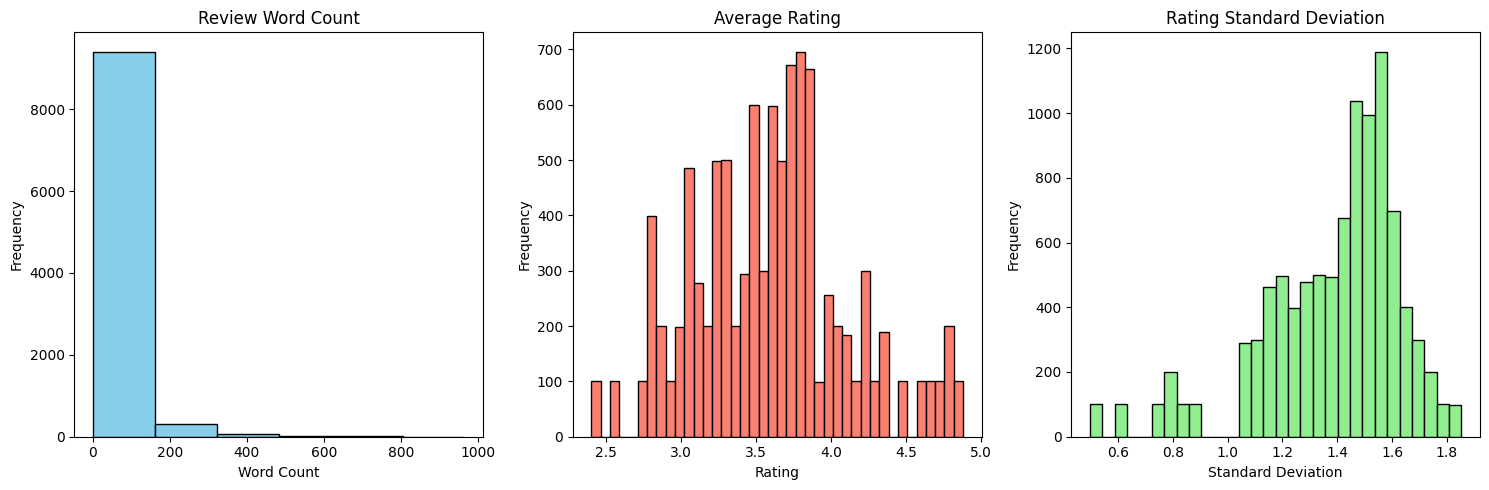

In [25]:
import matplotlib.pyplot as plt

# Create subplots for histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for Review_Word_Count
axs[0].hist(df3['Review_Word_Count'], bins=6, color='skyblue', edgecolor='black')
axs[0].set_title('Review Word Count')
axs[0].set_xlabel('Word Count')
axs[0].set_ylabel('Frequency')

# Plot histogram for Average_Rating
axs[1].hist(df3['Average_Rating'], bins=40, color='salmon', edgecolor='black')
axs[1].set_title('Average Rating')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

# Plot histogram for Rating_Std_Dev
axs[2].hist(df3['Rating_Std_Dev'], bins=30, color='lightgreen', edgecolor='black')
axs[2].set_title('Rating Standard Deviation')
axs[2].set_xlabel('Standard Deviation')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()

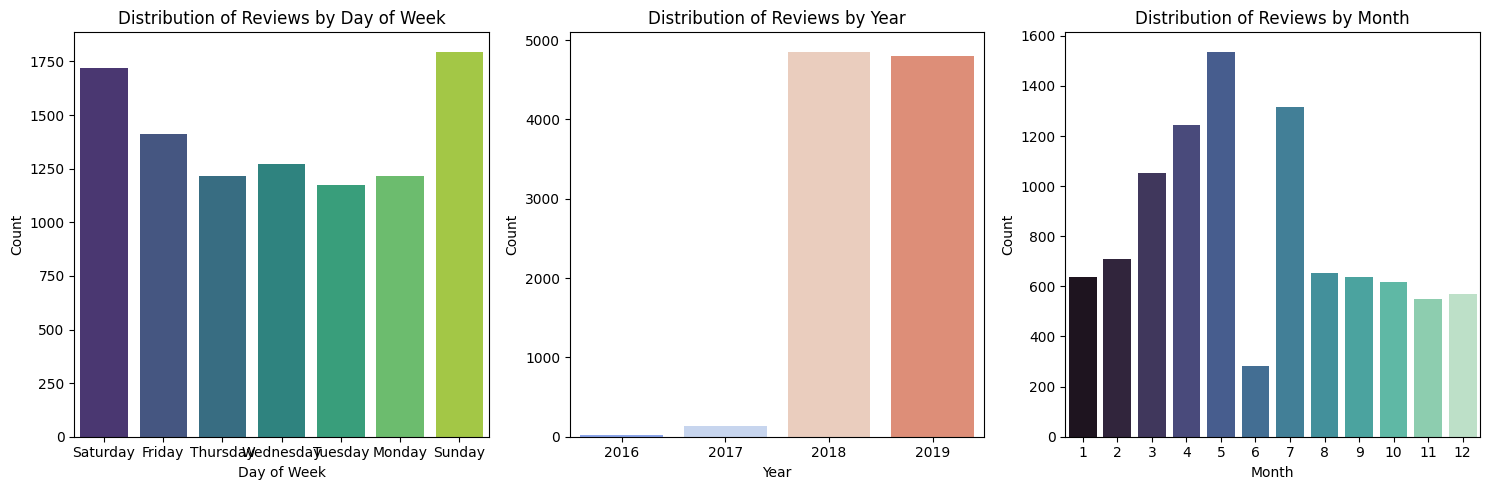

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot bar plot for DayOfWeek
sns.countplot(data=df3, x='DayOfWeek', ax=axs[0], palette='viridis')
axs[0].set_title('Distribution of Reviews by Day of Week')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Count')

# Plot bar plot for Year
sns.countplot(data=df3, x='Year', ax=axs[1], palette='coolwarm')
axs[1].set_title('Distribution of Reviews by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Count')

# Plot bar plot for Month
sns.countplot(data=df3, x='Month', ax=axs[2], palette='mako')
axs[2].set_title('Distribution of Reviews by Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the bar plots
plt.show()

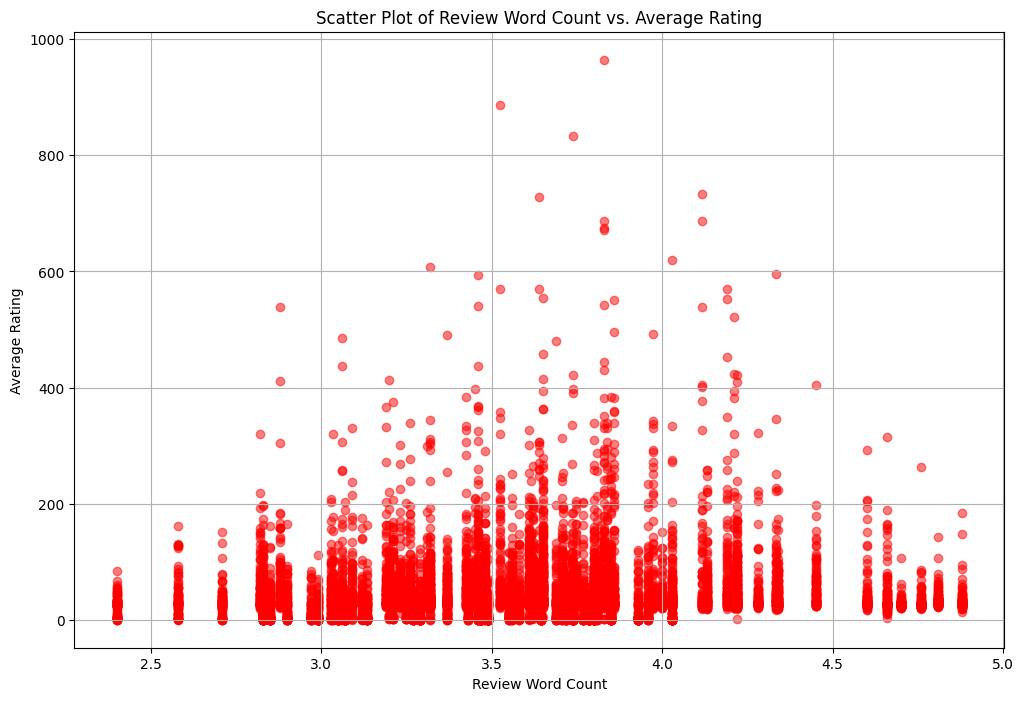

In [27]:
# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df3['Average_Rating'], df3['Review_Word_Count'], alpha=0.5, color='r')
plt.title('Scatter Plot of Review Word Count vs. Average Rating')
plt.xlabel('Review Word Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

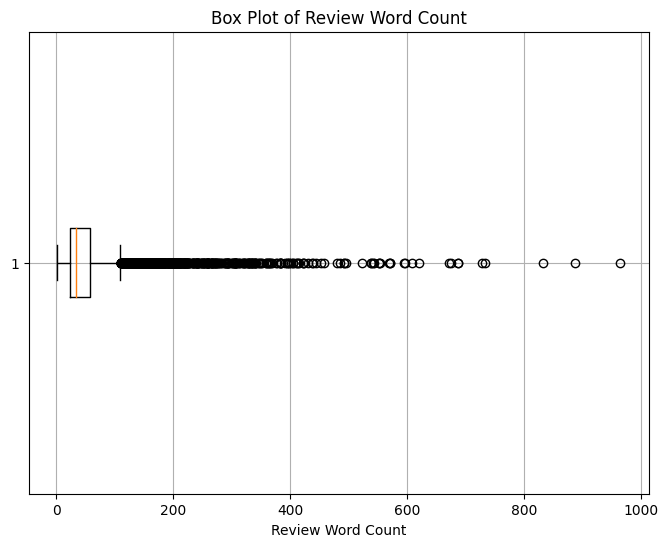

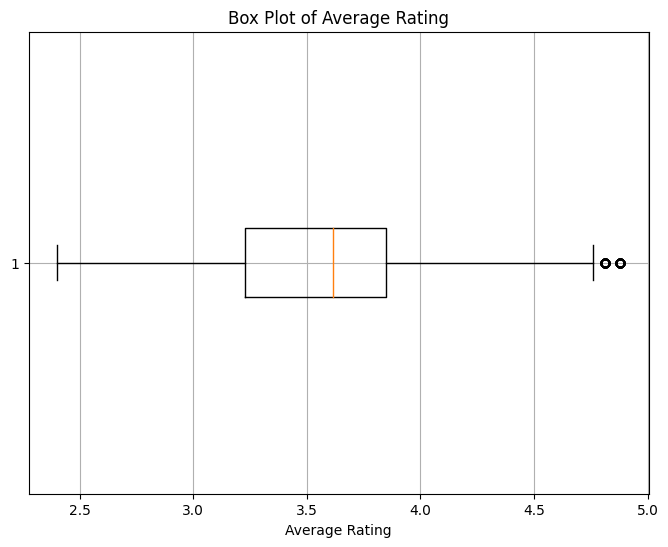

In [28]:
# Box plot for Review_Word_Count
plt.figure(figsize=(8, 6))
plt.boxplot(df3['Review_Word_Count'], vert=False)
plt.title('Box Plot of Review Word Count')
plt.xlabel('Review Word Count')
plt.grid(True)
plt.show()

# Box plot for Average_Rating
plt.figure(figsize=(8, 6))
plt.boxplot(df3['Average_Rating'], vert=False)
plt.title('Box Plot of Average Rating')
plt.xlabel('Average Rating')
plt.grid(True)
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

# Sample data 
data = df3

# Create a DataFrame 
df4 = pd.DataFrame(data)

# Define a function to update the pie chart based on restaurant selection
def update_pie_chart(restaurant):
    plt.figure(figsize=(6, 6))
    selected_data = df4[df4['Restaurant'] == restaurant]
    rating_counts = selected_data['Rating'].value_counts()
    labels = rating_counts.index
    colors = sns.color_palette('pastel', len(labels))  # Use pastel colors for segments
    plt.pie(rating_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Rating Distribution for {restaurant}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create a Dropdown widget to select a restaurant
restaurant_dropdown = widgets.Dropdown(
    options=df4['Restaurant'].unique(),
    description='Select Restaurant:',
    disabled=False,
)

# Create an interactive widget that updates the pie chart when a restaurant is selected
widgets.interactive(update_pie_chart, restaurant=restaurant_dropdown)

interactive(children=(Dropdown(description='Select Restaurant:', options=('Beyond Flavours', 'Paradise', 'Flec…

C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_11516\2643370569.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3.corr()


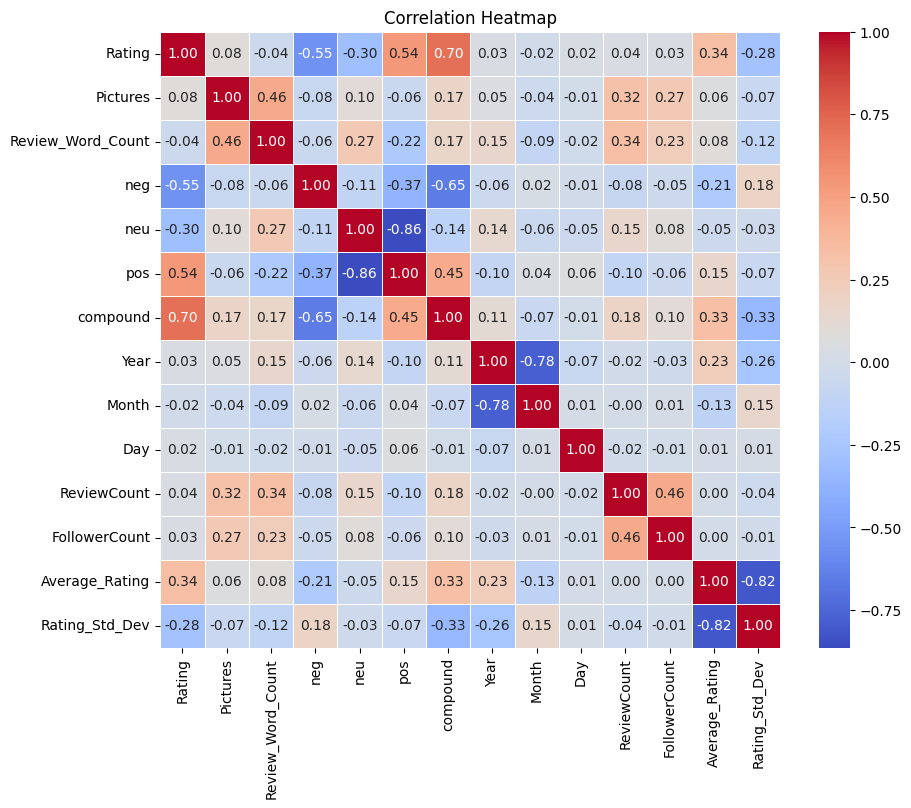

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df3.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

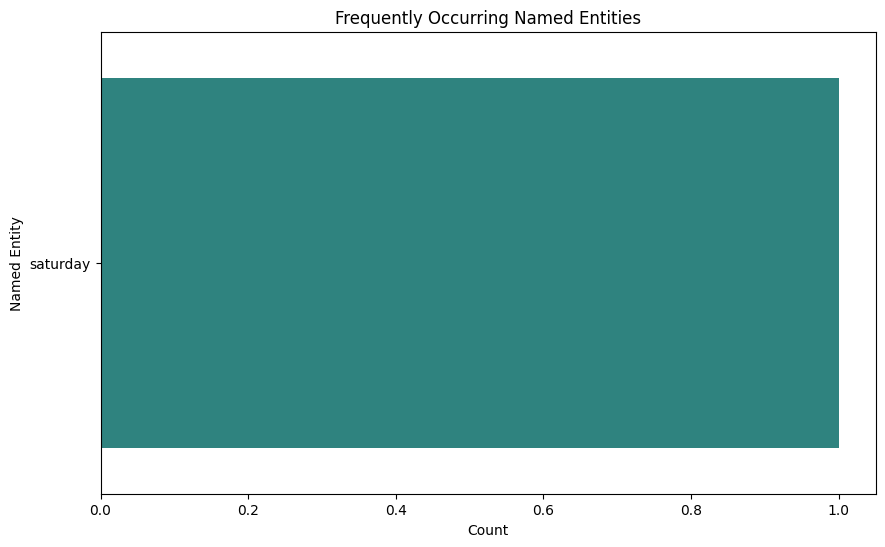

In [31]:
from collections import Counter

# Count the occurrences of each named entity
entity_counts = Counter(named_entities)

# Convert the counts to a DataFrame
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Count'])
entity_df = entity_df.reset_index().rename(columns={'index': 'Named Entity'})

# Sort by count in descending order
entity_df = entity_df.sort_values(by='Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Named Entity', data=entity_df, palette='viridis')
plt.title('Frequently Occurring Named Entities')
plt.xlabel('Count')
plt.ylabel('Named Entity')
plt.show()

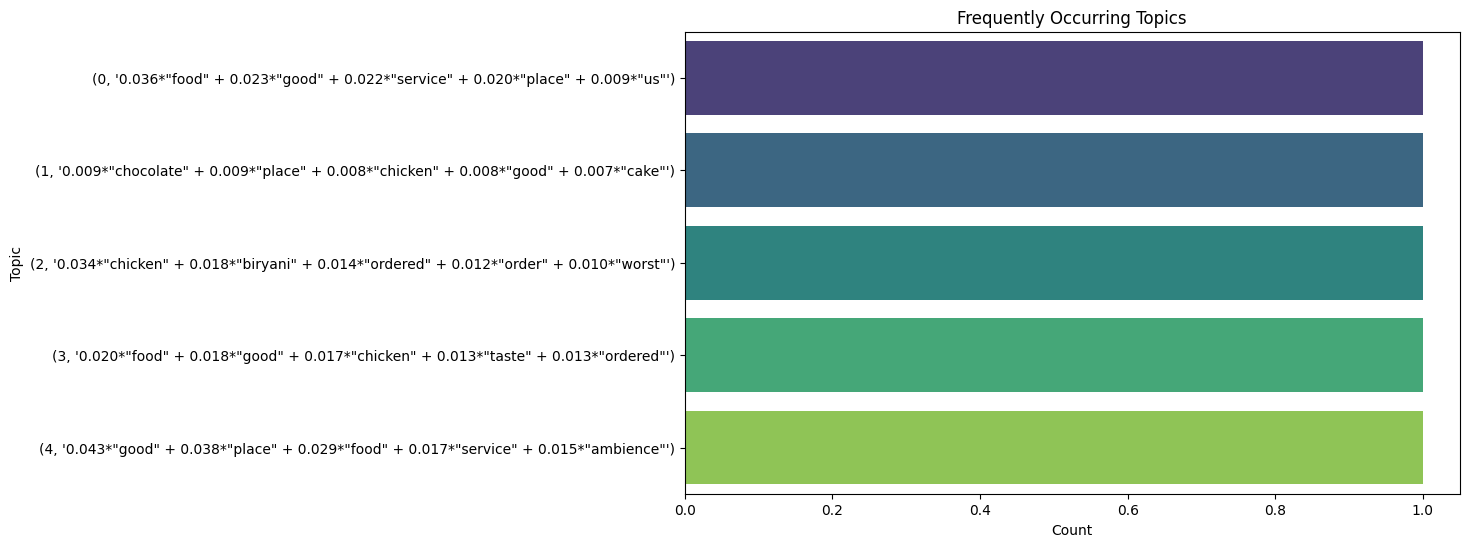

In [32]:
# Count the occurrences of each topic
topic_counts = Counter(topics)

# Convert the counts to a DataFrame
topic_df = pd.DataFrame.from_dict(topic_counts, orient='index', columns=['Count'])
topic_df = topic_df.reset_index().rename(columns={'index': 'Topic'})

# Sort by count in descending order
topic_df = topic_df.sort_values(by='Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Topic', data=topic_df, palette='viridis')
plt.title('Frequently Occurring Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10134 (\N{HEAVY MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtool

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128156 (\N{PURPLE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127854 (\N{CUSTARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127834 (\N{COOKED RICE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarni

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127789 (\N{HOT DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127997 (\N{EMOJI MODIFIER FITZPATRICK TYPE-4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylab

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128102 (\N{BOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128155 (\N{YELLOW HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129336 (\N{PERSON DOING CARTWHEEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-pack

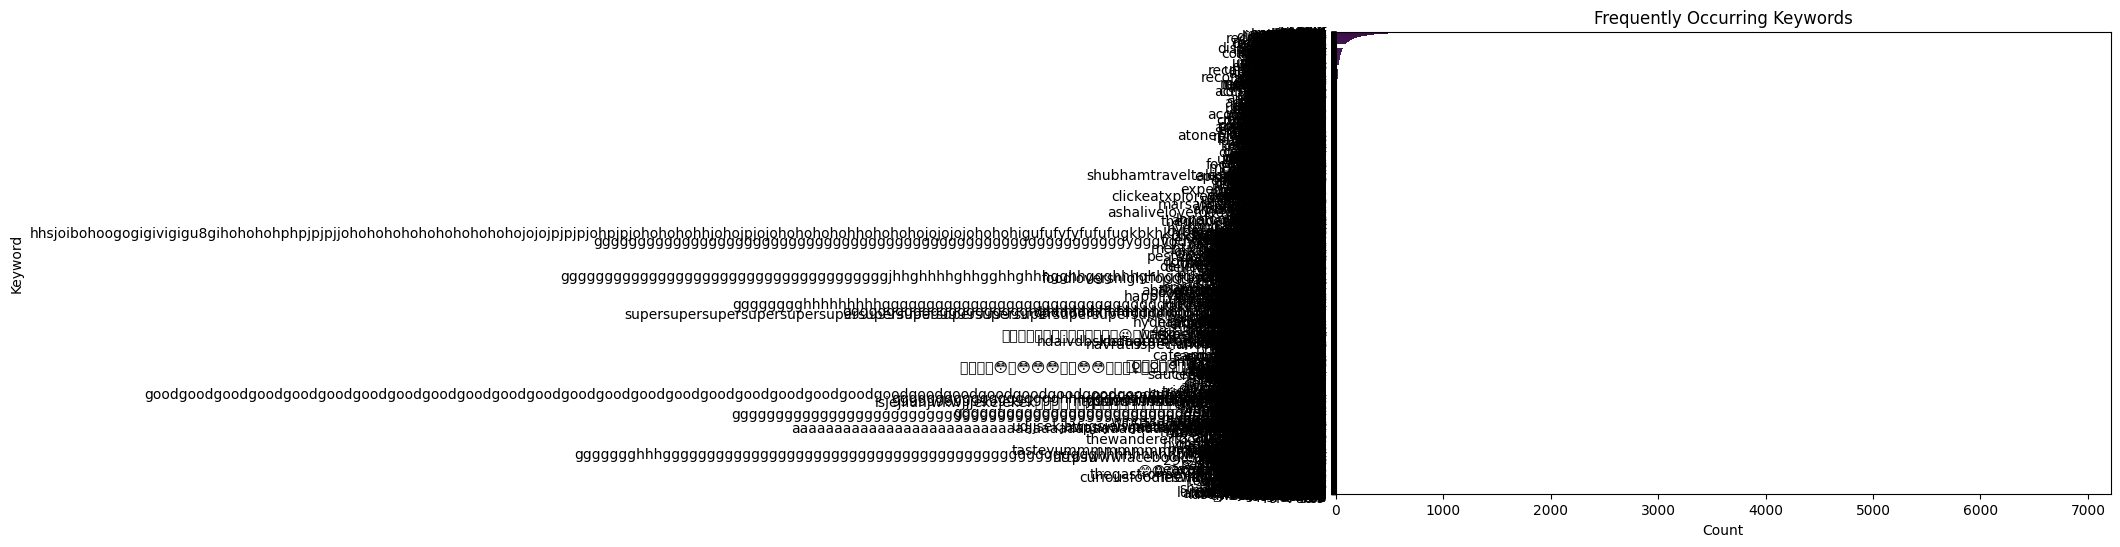

In [33]:
# # Extract keywords and their counts into separate lists and sort them by count in descending order
# keyword_frequency.sort(key=lambda x: x[1], reverse=True)
# keywords, counts = zip(*keyword_frequency)

# # Plot a bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(x=counts, y=keywords, palette='viridis')
# plt.title('Frequently Occurring Keywords')
# plt.xlabel('Count')
# plt.ylabel('Keyword')
# plt.show()

# Extract keywords and their counts into separate lists
keywords, counts = zip(*keyword_frequency)

# Convert keywords and counts to lists (if they are not already)
keywords = list(keywords)
counts = list(counts)

# Sort the keywords and counts by count in descending order
sorted_keywords = [x for _, x in sorted(zip(counts, keywords), key=lambda pair: pair[0], reverse=True)]
sorted_counts = sorted(counts, reverse=True)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_counts, y=sorted_keywords, palette='viridis')
plt.title('Frequently Occurring Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10134 (\N{HEAVY MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylab

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128020 (\N{CHICKEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129365 (\N{CARROT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: 

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129335 (\N{SHRUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython

C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127817 (\N{WATERMELON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127819 (\N{LEMON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129395 (\N{FACE WITH PARTY HORN AND PARTY HAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pyla

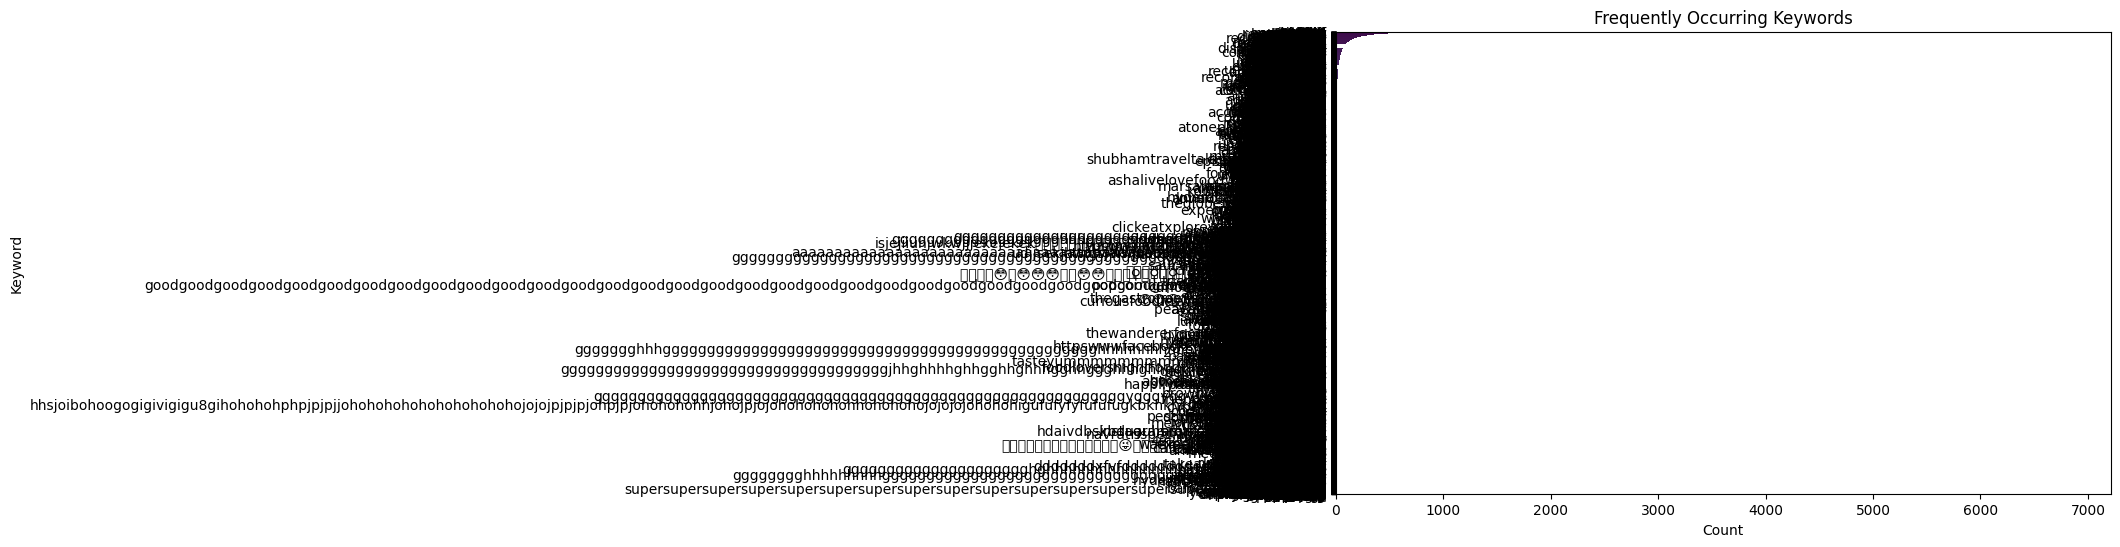

In [34]:
# Convert keyword_frequency to a Pandas DataFrame
df_keyword_frequency = pd.DataFrame(keyword_frequency, columns=['Keyword', 'Count'])

# Sort the DataFrame by 'Count' in descending order
df_keyword_frequency = df_keyword_frequency.sort_values(by='Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Keyword', data=df_keyword_frequency, palette='viridis')
plt.title('Frequently Occurring Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

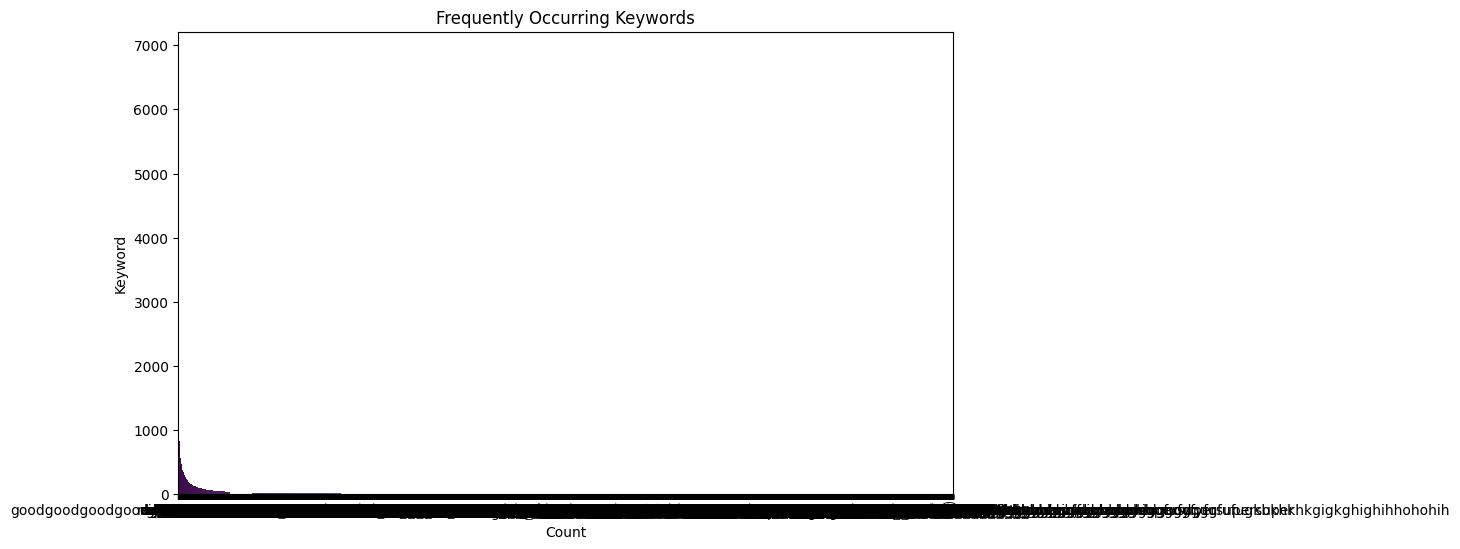

In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create a DataFrame from the keyword_frequency dictionary
df_keyword_frequency = pd.DataFrame(keyword_frequency, columns=['Keyword', 'Count'])

# Sort the DataFrame by 'Count' in descending order
df_keyword_frequency = df_keyword_frequency.sort_values(by='Count', ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Count', data=df_keyword_frequency, palette='viridis')
plt.title('Frequently Occurring Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

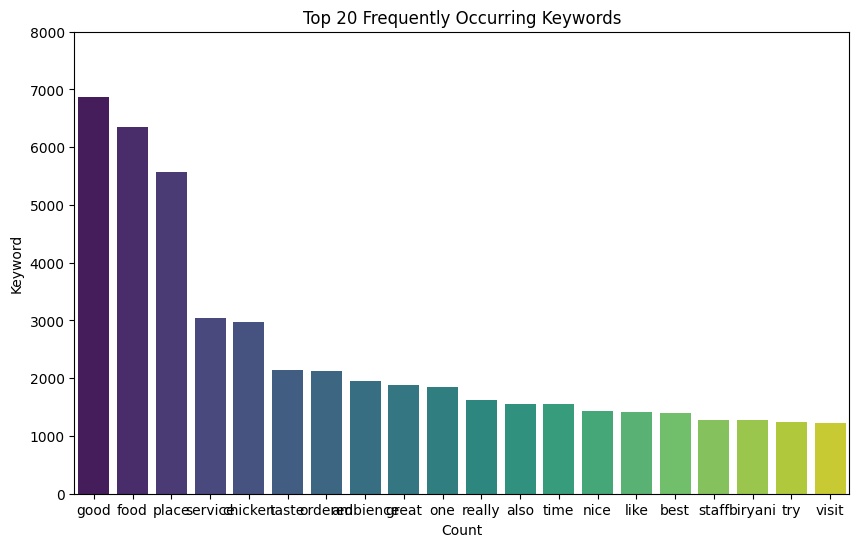

In [36]:
# Select the top N keywords with the highest counts (e.g., top 20)
top_n_keywords = df_keyword_frequency.head(20)

# Plot a bar chart for the top N keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Count', data=top_n_keywords, palette='viridis')
plt.title('Top 20 Frequently Occurring Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')

# Set the Y-axis limit (e.g., limit to 500)
plt.ylim(0, 8000)

plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
from IPython.display import display

# Function to calculate keyword frequency for a given restaurant
def calculate_keyword_frequency(selected_restaurant):
    # Filter the DataFrame for the selected restaurant
    filtered_df = df3[df3['Restaurant'] == selected_restaurant]
    
    # Calculate keyword frequency for the selected restaurant
    all_tokens = [token for text in filtered_df['Cleaned_Review'] for token in text.split()]
    word_frequency = {word: all_tokens.count(word) for word in set(all_tokens)}
    
    # Sort keywords by frequency in descending order
    sorted_keywords = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)[:20]
    
    # Convert to DataFrame
    df_keyword_frequency = pd.DataFrame(sorted_keywords, columns=['Keyword', 'Count'])
    
    # Plot the keyword frequency
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Count', y='Keyword', data=df_keyword_frequency, palette='viridis')
    plt.title(f'Top 20 Keywords for {selected_restaurant}')
    plt.xlabel('Count')
    plt.ylabel('Keyword')
    plt.show()

# Get unique restaurant names
unique_restaurants = df3['Restaurant'].unique()

# Create a dropdown widget for selecting a restaurant
restaurant_dropdown = widgets.Dropdown(
    options=unique_restaurants,
    description='Select Restaurant:'
)

# Create an output widget to display the keyword frequency plot
output_plot = widgets.Output()

# Define a function to update the plot when a restaurant is selected
def update_plot(change):
    selected_restaurant = change.new
    with output_plot:
        output_plot.clear_output()
        calculate_keyword_frequency(selected_restaurant)

# Connect the dropdown selection to the update function
restaurant_dropdown.observe(update_plot, names='value')

# Display the widgets
display(restaurant_dropdown, output_plot)

Dropdown(description='Select Restaurant:', options=('Beyond Flavours', 'Paradise', 'Flechazo', 'Shah Ghouse Ho…

Output()

In [38]:
import seaborn as sns
from ipywidgets import widgets, interact, Layout
from IPython.display import display

# Create a function to update the bar plots
def update_plots(selected_restaurant, time_period):
    plt.figure(figsize=(12, 6))
    
    if time_period == 'Year':
        df_filtered = df3[df3['Restaurant'] == selected_restaurant].groupby('Year').agg({
            'ReviewCount': 'sum',
            'Average_Rating': 'mean'
        }).reset_index()
        x_label = 'Year'
    elif time_period == 'Month':
        df_filtered = df3[df3['Restaurant'] == selected_restaurant].groupby('Month').agg({
            'ReviewCount': 'sum',
            'Average_Rating': 'mean'
        }).reset_index()
        x_label = 'Month'
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=x_label, y='ReviewCount', data=df_filtered, palette='viridis')
    plt.title(f'Review Count for {selected_restaurant}')
    plt.xlabel(x_label)
    plt.ylabel('Review Count')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=x_label, y='Average_Rating', data=df_filtered, palette='viridis')
    plt.title(f'Average Rating for {selected_restaurant}')
    plt.xlabel(x_label)
    plt.ylabel('Average Rating')
    
    plt.tight_layout()
    plt.show()

# Get unique restaurant names and time periods
unique_restaurants = df3['Restaurant'].unique()
time_periods = ['Year', 'Month']

# Create widgets
restaurant_dropdown = widgets.Dropdown(
    options=unique_restaurants,
    description='Select Restaurant:'
)

time_period_dropdown = widgets.Dropdown(
    options=time_periods,
    description='Select Time Period:'
)

output_plots = widgets.Output(layout=Layout(height='400px'))

# Define a function to update the plots based on user selections
def update_plots_on_change(change):
    with output_plots:
        output_plots.clear_output()
        update_plots(restaurant_dropdown.value, time_period_dropdown.value)

# Connect the dropdown selections to the update function
restaurant_dropdown.observe(update_plots_on_change, names='value')
time_period_dropdown.observe(update_plots_on_change, names='value')

# Display the widgets
display(restaurant_dropdown, time_period_dropdown, output_plots)

Dropdown(description='Select Restaurant:', options=('Beyond Flavours', 'Paradise', 'Flechazo', 'Shah Ghouse Ho…

Dropdown(description='Select Time Period:', options=('Year', 'Month'), value='Year')

Output(layout=Layout(height='400px'))

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
from IPython.display import display

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a function to update the bar plots
def update_plots(selected_restaurant, time_period):
    plt.figure(figsize=(12, 5))
    
    if time_period == 'Year':
        df_filtered = df3[df3['Restaurant'] == selected_restaurant].groupby('Year').agg({
            'ReviewCount': 'sum',
            'Average_Rating': 'mean'
        }).reset_index()
        x_label = 'Year'
    elif time_period == 'Month':
        df_filtered = df3[df3['Restaurant'] == selected_restaurant].groupby('Month').agg({
            'ReviewCount': 'sum',
            'Average_Rating': 'mean'
        }).reset_index()
        x_label = 'Month'
        # Convert numeric month values to month names
        df_filtered['Month'] = df_filtered['Month'].apply(lambda x: month_names[x - 1])
    
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(x=x_label, y='ReviewCount', data=df_filtered, palette='viridis', ax=ax1)
    plt.title(f'Review Count for {selected_restaurant}')
    ax1.set_ylim([0, 4000])
    plt.xlabel(x_label)
    plt.ylabel('Review Count')
    ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
    
    ax2 = plt.subplot(1, 2, 2)  
    sns.barplot(x=x_label, y='Average_Rating', data=df_filtered, palette='viridis', ax=ax2)
    plt.title(f'Average Rating for {selected_restaurant}')
    ax2.set_ylim([0, 5])
    ax2.set_ylabel('Average Rating')
    ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
    
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
        
    plt.tight_layout()
    plt.show()

# Get unique restaurant names and time periods
unique_restaurants = df3['Restaurant'].unique()
time_periods = ['Year', 'Month']

# Create widgets
restaurant_dropdown = widgets.Dropdown(
    options=unique_restaurants,
    description='Select Restaurant:'
)

time_period_dropdown = widgets.Dropdown(
    options=time_periods,
    description='Select Time Period:'
)

output_plots = widgets.Output(layout=Layout(height='400px'))

# Define a function to update the plots based on user selections
def update_plots_on_change(change):
    with output_plots:
        output_plots.clear_output()
        update_plots(restaurant_dropdown.value, time_period_dropdown.value)

# Connect the dropdown selections to the update function
restaurant_dropdown.observe(update_plots_on_change, names='value')
time_period_dropdown.observe(update_plots_on_change, names='value')

# Display the widgets
display(restaurant_dropdown, time_period_dropdown, output_plots)

Dropdown(description='Select Restaurant:', options=('Beyond Flavours', 'Paradise', 'Flechazo', 'Shah Ghouse Ho…

Dropdown(description='Select Time Period:', options=('Year', 'Month'), value='Year')

Output(layout=Layout(height='400px'))

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def update_pie_chart(selected_restaurant):
    # Filter the DataFrame for the selected restaurant
    restaurant_data = df3[df3['Restaurant'] == selected_restaurant]

    # Calculate the sentiment score distribution for the selected restaurant
    sentiment_counts = restaurant_data[['neg', 'neu', 'pos']].mean()

    # Create a Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {selected_restaurant}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()
    
unique_restaurants = df3['Restaurant'].unique()

restaurant_dropdown = widgets.Dropdown(
    options=unique_restaurants,
    description='Select Restaurant:',
)

output_pie_chart = widgets.Output()

def update_pie_chart_on_change(change):
    with output_pie_chart:
        output_pie_chart.clear_output()
        update_pie_chart(restaurant_dropdown.value)

restaurant_dropdown.observe(update_pie_chart_on_change, names='value')

display(restaurant_dropdown, output_pie_chart)

Dropdown(description='Select Restaurant:', options=('Beyond Flavours', 'Paradise', 'Flechazo', 'Shah Ghouse Ho…

Output()

C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_11516\3635851933.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=group_col, y=value_col, ci=None, palette='viridis')


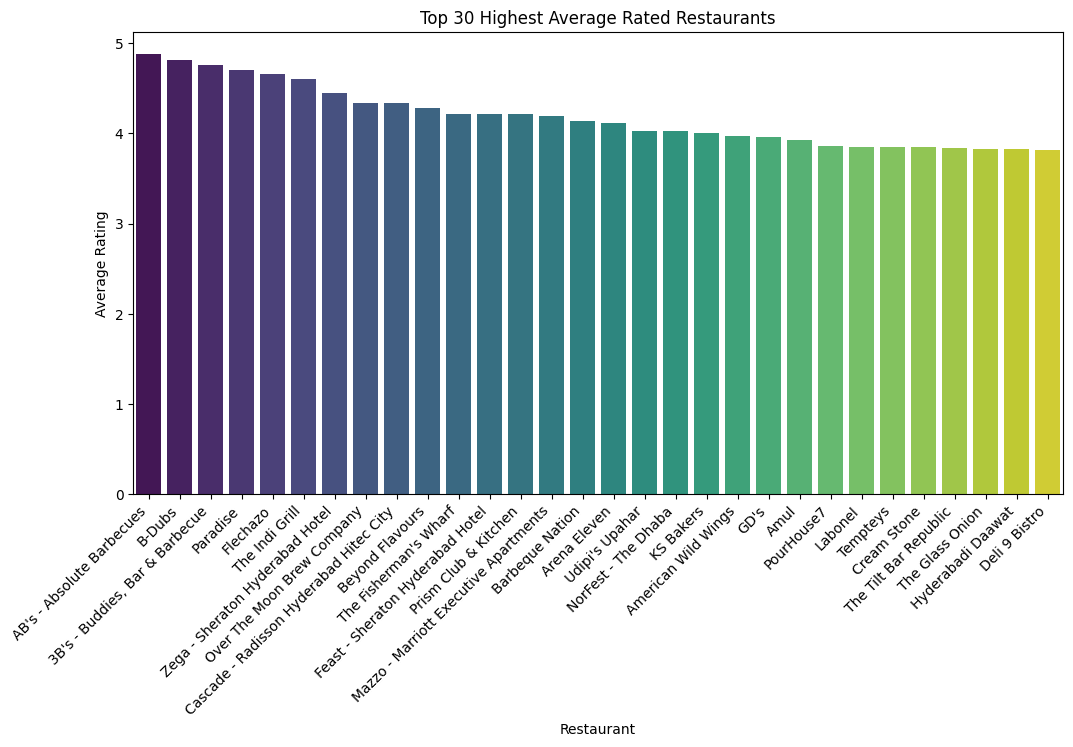

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_bar(df, group_col, value_col, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x=group_col, y=value_col, ci=None, palette='viridis')
    plt.title(title)
    plt.xlabel(group_col)
    plt.ylabel(f'Average {value_col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
# Group the data by 'Restaurant' and calculate the mean rating
restaurant_avg_ratings = df3.groupby('Restaurant')['Rating'].mean().reset_index()

# Sort the restaurants by average rating in descending order and select the top 30
top_30_restaurants = restaurant_avg_ratings.sort_values(by='Rating', ascending=False).head(30)

# Call the function to plot grouped bar for the top 30 highest average rated restaurants
plot_grouped_bar(top_30_restaurants, 'Restaurant', 'Rating', 'Top 30 Highest Average Rated Restaurants')


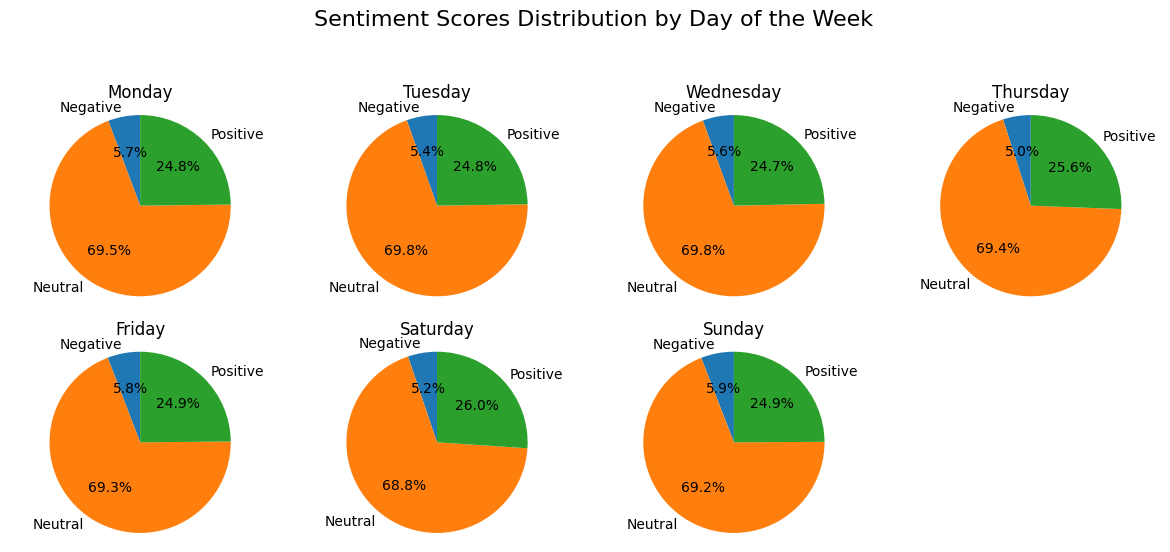

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the relevant columns
sentiment_data = df3[['DayOfWeek', 'neg', 'neu', 'pos']]

# Group the data by 'DayOfWeek' and calculate the mean sentiment scores
sentiment_by_day = sentiment_data.groupby('DayOfWeek').mean().reset_index()

# Create a pie chart for each day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
for index, day in enumerate(days):
    plt.subplot(3, 4, index + 1)
    plt.pie(sentiment_by_day.loc[sentiment_by_day['DayOfWeek'] == day, ['neg', 'neu', 'pos']].values[0],
            labels=['Negative', 'Neutral', 'Positive'],
            autopct='%1.1f%%',
            startangle=90)
    plt.title(day)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Sentiment Scores Distribution by Day of the Week', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the subplot layout
plt.show()

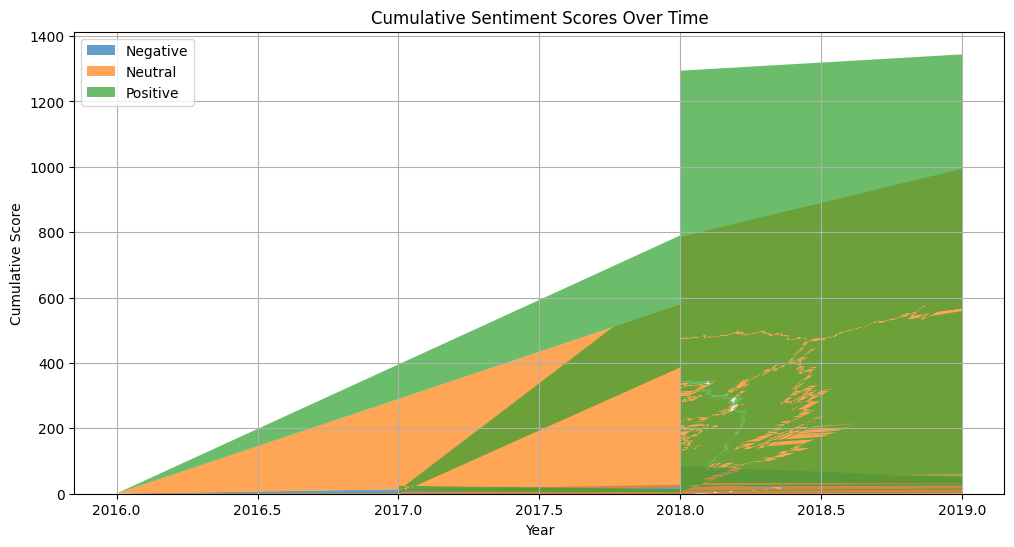

In [43]:
# Create a copy of the DataFrame to avoid warnings
sentiment_data = df3[['Year', 'Month', 'neg', 'neu', 'pos']].copy()

# Group the data by 'Year' and 'Month' and calculate the cumulative sum of sentiment scores
sentiment_data['cumulative_neg'] = sentiment_data.groupby(['Year', 'Month'])['neg'].cumsum()
sentiment_data['cumulative_neu'] = sentiment_data.groupby(['Year', 'Month'])['neu'].cumsum()
sentiment_data['cumulative_pos'] = sentiment_data.groupby(['Year', 'Month'])['pos'].cumsum()

# Create a stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(sentiment_data['Year'], sentiment_data['cumulative_neg'], sentiment_data['cumulative_neu'], sentiment_data['cumulative_pos'],
              labels=['Negative', 'Neutral', 'Positive'], alpha=0.7)
plt.title('Cumulative Sentiment Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

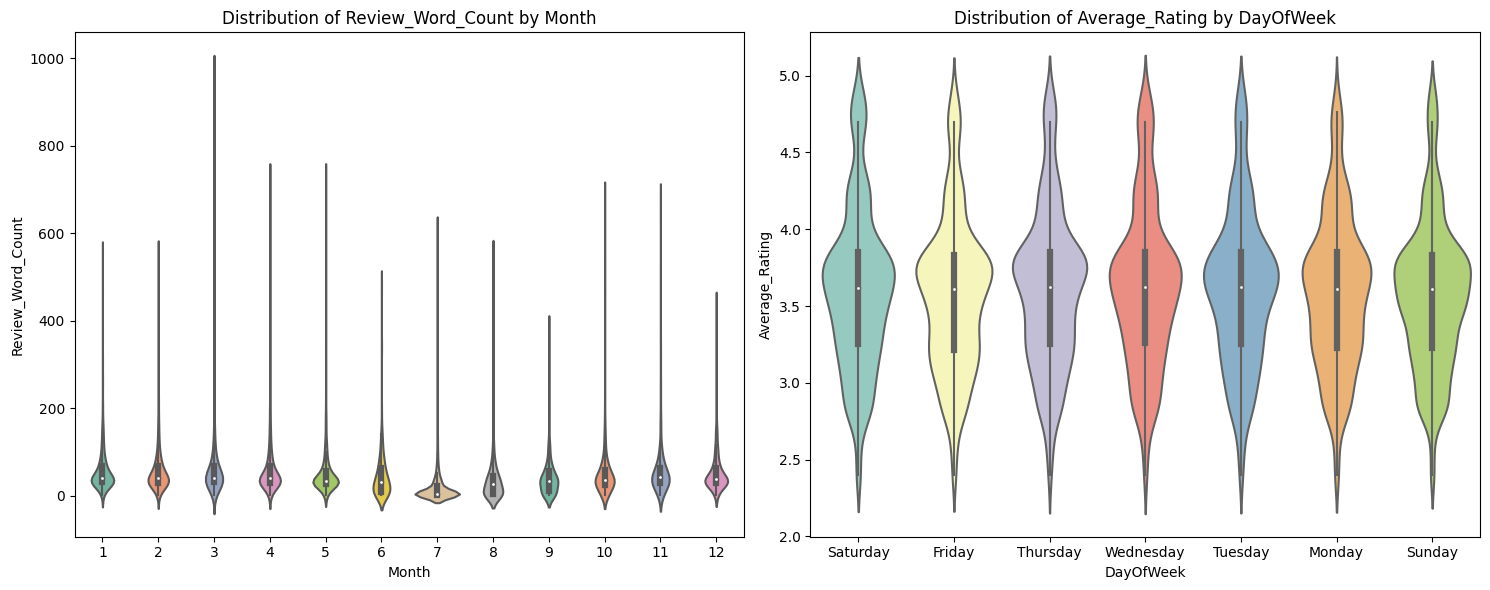

In [44]:
# Create subplots for Month and DayOfWeek
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Violin plot for Review_Word_Count by Month
sns.violinplot(x='Month', y='Review_Word_Count', data=df3, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Review_Word_Count by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Review_Word_Count')

# Violin plot for Average_Rating by DayOfWeek
sns.violinplot(x='DayOfWeek', y='Average_Rating', data=df3, ax=axes[1], palette='Set3')
axes[1].set_title('Distribution of Average_Rating by DayOfWeek')
axes[1].set_xlabel('DayOfWeek')
axes[1].set_ylabel('Average_Rating')

plt.tight_layout()
plt.show()

# Prediction of Rating from 1 to 5 Using Only Cleaned Review as Label

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Preprocess the data
max_words = 10000  # Define the maximum number of words to use in the tokenizer
max_len = 100      # Define the maximum sequence length

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df3['Cleaned_Review'])
sequences = tokenizer.texts_to_sequences(df3['Cleaned_Review'])
X = pad_sequences(sequences, maxlen=max_len)

# Encode the target variable 'Rating'
label_encoder = LabelEncoder()
df3['Rating'] = label_encoder.fit_transform(df3['Rating'])
y = to_categorical(df3['Rating'], num_classes=5)  # Assuming we have 5 classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(192, return_sequences=True))
model.add(LSTM(192))
model.add(Dense(192, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/25
123/123 [==============================] - 83s 646ms/step - loss: 1.2134 - accuracy: 0.5052 - val_loss: 0.9503 - val_accuracy: 0.6198
Epoch 2/25
123/123 [==============================] - 79s 647ms/step - loss: 0.8291 - accuracy: 0.6695 - val_loss: 0.9653 - val_accuracy: 0.6239
Epoch 3/25
123/123 [==============================] - 79s 643ms/step - loss: 0.6649 - accuracy: 0.7393 - val_loss: 0.9986 - val_accuracy: 0.6157
Epoch 4/25
123/123 [==============================] - 78s 633ms/step - loss: 0.5428 - accuracy: 0.7979 - val_loss: 1.0662 - val_accuracy: 0.6137
Epoch 5/25
123/123 [==============================] - 85s 690ms/step - loss: 0.4533 - accuracy: 0.8345 - val_loss: 1.3575 - val_accuracy: 0.5815
Epoch 6/25
123/123 [==============================] - 80s 653ms/step - loss: 0.3869 - accuracy: 0.8646 - val_loss: 1.3971 - val_accuracy: 0.5943
Epoch 7/25
123/123 [==============================] - 80s 649ms/step - loss: 0.3344 - accuracy: 0.8825 - val_loss: 1.6011 - val_ac

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Preprocess the data
max_words = 10000  # Define the maximum number of words to use in the tokenizer
max_len = 100      # Define the maximum sequence length
my_learning_rate = 0.005

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df3['Cleaned_Review'])
sequences = tokenizer.texts_to_sequences(df3['Cleaned_Review'])
X = pad_sequences(sequences, maxlen=max_len)

# Encode the target variable 'Rating'
label_encoder = LabelEncoder()
df3['Rating'] = label_encoder.fit_transform(df3['Rating'])
y = to_categorical(df3['Rating'], num_classes=5)  


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(512, return_sequences=True, kernel_regularizer=l2(0.03)))
model.add(LSTM(512, kernel_regularizer=l2(0.03)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.03)))  
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  

# Define a custom optimizer with the user-defined learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])

# # Implement early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model and collect history for loss plotting
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=800, callbacks=[early_stopping])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

# Plot training and test loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on test data
predictions = model.predict(X_test)

Epoch 1/20
123/123 [==============================] - 586s 5s/step - loss: 7.8122 - accuracy: 0.3853 - val_loss: 1.4720 - val_accuracy: 0.3950
Epoch 2/20
123/123 [==============================] - 579s 5s/step - loss: 1.4735 - accuracy: 0.3888 - val_loss: 1.4650 - val_accuracy: 0.3950
Epoch 3/20
123/123 [==============================] - 583s 5s/step - loss: 1.4704 - accuracy: 0.3888 - val_loss: 1.4596 - val_accuracy: 0.3950
Epoch 4/20
123/123 [==============================] - 579s 5s/step - loss: 1.4693 - accuracy: 0.3888 - val_loss: 1.4611 - val_accuracy: 0.3950
Epoch 5/20
123/123 [==============================] - 584s 5s/step - loss: 1.4653 - accuracy: 0.3888 - val_loss: 1.4540 - val_accuracy: 0.3950
Epoch 6/20
123/123 [==============================] - 589s 5s/step - loss: 1.4633 - accuracy: 0.3888 - val_loss: 1.4533 - val_accuracy: 0.3950
Epoch 7/20
123/123 [==============================] - 579s 5s/step - loss: 1.4626 - accuracy: 0.3888 - val_loss: 1.4537 - val_accuracy: 0.3950

KeyboardInterrupt: 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Convert one-hot encoded predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate and print the classification report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", report)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       352
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       224
           3       0.00      0.00      0.00       473
           4       0.40      1.00      0.57       775

    accuracy                           0.40      1962
   macro avg       0.08      0.20      0.11      1962
weighted avg       0.16      0.40      0.22      1962

Confusion Matrix:
 [[  0   0   0   0 352]
 [  0   0   0   0 138]
 [  0   0   0   0 224]
 [  0   0   0   0 473]
 [  0   0   0   0 775]]


# Predictions of Rating using neg, pos, compound, Average_Rating and Rating_Std_Dev as labels

Epoch 1/15
46/46 [==============================] - 28s 532ms/step - loss: 6.6245 - accuracy: 0.4339 - val_loss: 3.6329 - val_accuracy: 0.5464
Epoch 2/15
46/46 [==============================] - 25s 533ms/step - loss: 2.5658 - accuracy: 0.5233 - val_loss: 1.8092 - val_accuracy: 0.5479
Epoch 3/15
46/46 [==============================] - 25s 554ms/step - loss: 1.5674 - accuracy: 0.5496 - val_loss: 1.3222 - val_accuracy: 0.5678
Epoch 4/15
46/46 [==============================] - 25s 545ms/step - loss: 1.2424 - accuracy: 0.6011 - val_loss: 1.1792 - val_accuracy: 0.5601
Epoch 5/15
46/46 [==============================] - 25s 555ms/step - loss: 1.1098 - accuracy: 0.6320 - val_loss: 1.1750 - val_accuracy: 0.5719
Epoch 6/15
46/46 [==============================] - 25s 550ms/step - loss: 1.0093 - accuracy: 0.6631 - val_loss: 1.0938 - val_accuracy: 0.5882
Epoch 7/15
46/46 [==============================] - 25s 546ms/step - loss: 0.9207 - accuracy: 0.6927 - val_loss: 1.1261 - val_accuracy: 0.5800

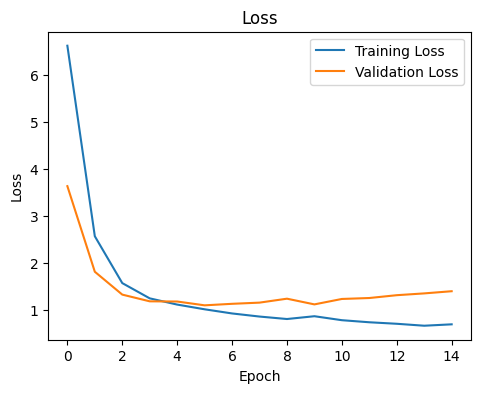

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Input, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Define your features and target
X_text = df3['Cleaned_Review'].values
X_numeric = df3[['neg', 'pos', 'compound', 'Average_Rating', 'Rating_Std_Dev']].values
y = df3['Rating'].values

# Split the data into training, validation, and test sets
X_text_train, X_text_temp, X_numeric_train, X_numeric_temp, y_train, y_temp = train_test_split(X_text, X_numeric, y, test_size=0.4, random_state=42)
X_text_val, X_text_test, X_numeric_val, X_numeric_test, y_val, y_test = train_test_split(X_text_temp, X_numeric_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize the text data
max_words = 10000  # Define the maximum number of words to use in the tokenizer
max_len = 100      # Define the maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text_train)
sequences_train = tokenizer.texts_to_sequences(X_text_train)
sequences_val = tokenizer.texts_to_sequences(X_text_val)
sequences_test = tokenizer.texts_to_sequences(X_text_test)
X_text_train = pad_sequences(sequences_train, maxlen=max_len)
X_text_val = pad_sequences(sequences_val, maxlen=max_len)
X_text_test = pad_sequences(sequences_test, maxlen=max_len)

# Normalize the numeric features (optional but often beneficial)
scaler = StandardScaler()
X_numeric_train = scaler.fit_transform(X_numeric_train)
X_numeric_val = scaler.transform(X_numeric_val)
X_numeric_test = scaler.transform(X_numeric_test)

# Convert the target variable to one-hot encoded format
y_train = to_categorical(y_train - 1, num_classes=5)
y_val = to_categorical(y_val - 1, num_classes=5)
y_test = to_categorical(y_test - 1, num_classes=5)

# Define the neural network model using the Functional API
text_input = Input(shape=(max_len,))
text_embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(text_input)
lstm_layer = LSTM(128, kernel_regularizer=l2(0.032))(text_embedding)

numeric_input = Input(shape=(5,))
concatenated = concatenate([lstm_layer, numeric_input], axis=-1)
dense_layer1 = Dense(64, activation='relu', kernel_regularizer=l2(0.032))(concatenated)
dropout_layer = Dropout(0.4)(dense_layer1)
output = Dense(5, activation='softmax')(dropout_layer)

model = Model(inputs=[text_input, numeric_input], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and collect history for loss plotting
history = model.fit(
    [X_text_train, X_numeric_train], y_train,
    validation_data=([X_text_val, X_numeric_val], y_val),
    epochs=15, batch_size=128, verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model on the test data
loss, accuracy = model.evaluate([X_text_test, X_numeric_test], y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

In [185]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the trained model to make predictions on the test data
y_pred = model.predict([X_text_test, X_numeric_test])

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1) + 1  # Add 1 to match the original class labels

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1) + 1  # Add 1 to match the original class labels

# Calculate and print the classification report
print(classification_report(y_true_labels, y_pred_labels))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

62/62 [==============================] - 5s 66ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       133
           2       0.32      0.27      0.30       233
           3       0.47      0.45      0.46       465
           4       0.71      0.82      0.76       785
           5       0.62      0.73      0.67       346

    accuracy                           0.60      1962
   macro avg       0.42      0.46      0.44      1962
weighted avg       0.54      0.60      0.57      1962

Confusion Matrix:
[[  0  26  18   8  81]
 [  0  64  79  40  50]
 [  0  44 209 195  17]
 [  0  12 120 646   7]
 [  0  54  22  16 254]]


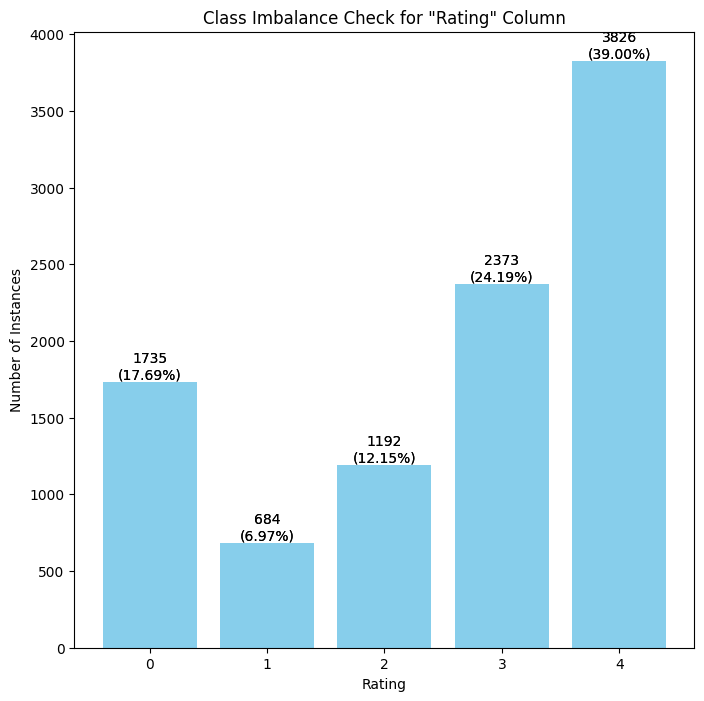

In [183]:
ratings = df3['Rating'].value_counts().sort_index()

# Calculate the percentage of occurrence
total_instances = len(df3)
percentage = (ratings / total_instances) * 100

# Create a bar plot to visualize class imbalance with percentages
plt.figure(figsize=(8, 8))
plt.bar(ratings.index, ratings.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Number of Instances')
plt.title('Class Imbalance Check for "Rating" Column')

# Annotate the plot with class occurrences and percentages
for i, count in enumerate(ratings.values):
    plt.text(ratings.index[i], count, f'{count}\n({percentage[i]:.2f}%)', ha='center', va='bottom')

# Annotate the plot with class occurrences and percentages
for i, count in enumerate(ratings.values):
    plt.text(ratings.index[i], count, f'{count}\n({percentage[i]:.2f}%)', ha='center', va='bottom')
    
plt.xticks(range(0, 5))  

plt.show()

Epoch 1/30
46/46 [==============================] - 30s 589ms/step - loss: 7.8267 - accuracy: 0.3981 - val_loss: 4.1927 - val_accuracy: 0.5245
Epoch 2/30
46/46 [==============================] - 24s 523ms/step - loss: 2.9896 - accuracy: 0.4577 - val_loss: 2.0375 - val_accuracy: 0.5464
Epoch 3/30
46/46 [==============================] - 24s 526ms/step - loss: 1.7989 - accuracy: 0.4871 - val_loss: 1.4680 - val_accuracy: 0.5275
Epoch 4/30
46/46 [==============================] - 25s 547ms/step - loss: 1.4845 - accuracy: 0.4915 - val_loss: 1.3081 - val_accuracy: 0.5479
Epoch 5/30
46/46 [==============================] - 24s 533ms/step - loss: 1.3716 - accuracy: 0.4896 - val_loss: 1.2322 - val_accuracy: 0.5484
Epoch 6/30
46/46 [==============================] - 24s 523ms/step - loss: 1.3266 - accuracy: 0.4985 - val_loss: 1.2272 - val_accuracy: 0.5469
Epoch 7/30
46/46 [==============================] - 24s 523ms/step - loss: 1.3065 - accuracy: 0.4978 - val_loss: 1.2103 - val_accuracy: 0.5387

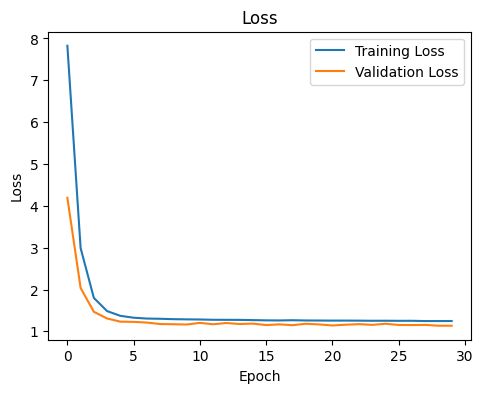

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Input, concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical

# Calculate class weights
class_labels = np.unique(y_train.argmax(axis=1))  # Get the unique class labels
class_counts = np.bincount(y_train.argmax(axis=1))
total_samples = len(y_train)

class_weights = total_samples / (len(class_labels) * class_counts)

# Create a dictionary with class weights
class_weight_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}

# Define your features and target
X_text = df3['Cleaned_Review'].values
X_numeric = df3[['neg', 'pos', 'compound', 'Average_Rating', 'Rating_Std_Dev']].values
y = df3['Rating'].values

# Split the data into training, validation, and test sets
X_text_train, X_text_temp, X_numeric_train, X_numeric_temp, y_train, y_temp = train_test_split(X_text, X_numeric, y, test_size=0.4, random_state=42)
X_text_val, X_text_test, X_numeric_val, X_numeric_test, y_val, y_test = train_test_split(X_text_temp, X_numeric_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize the text data
max_words = 10000  # Define the maximum number of words to use in the tokenizer
max_len = 100      # Define the maximum sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_text_train)
sequences_train = tokenizer.texts_to_sequences(X_text_train)
sequences_val = tokenizer.texts_to_sequences(X_text_val)
sequences_test = tokenizer.texts_to_sequences(X_text_test)
X_text_train = pad_sequences(sequences_train, maxlen=max_len)
X_text_val = pad_sequences(sequences_val, maxlen=max_len)
X_text_test = pad_sequences(sequences_test, maxlen=max_len)

# Normalize the numeric features (optional but often beneficial)
scaler = StandardScaler()
X_numeric_train = scaler.fit_transform(X_numeric_train)
X_numeric_val = scaler.transform(X_numeric_val)
X_numeric_test = scaler.transform(X_numeric_test)

# Convert the target variable to one-hot encoded format
y_train = to_categorical(y_train - 1, num_classes=5)
y_val = to_categorical(y_val - 1, num_classes=5)
y_test = to_categorical(y_test - 1, num_classes=5)

# Define the neural network model using the Functional API
text_input = Input(shape=(max_len,))
text_embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(text_input)
lstm_layer = LSTM(128, kernel_regularizer=l2(0.039))(text_embedding)

numeric_input = Input(shape=(5,))
concatenated = concatenate([lstm_layer, numeric_input], axis=-1)
dense_layer1 = Dense(64, activation='relu', kernel_regularizer=l2(0.039))(concatenated)
dropout_layer = Dropout(0.4)(dense_layer1)
output = Dense(5, activation='softmax')(dropout_layer)

model = Model(inputs=[text_input, numeric_input], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and collect history for loss plotting
history = model.fit(
    [X_text_train, X_numeric_train], y_train,
    validation_data=([X_text_val, X_numeric_val], y_val),
    epochs=30, batch_size=128, verbose=1,
    class_weight=class_weight_dict  # Pass the class weights here
)

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model on the test data
loss, accuracy = model.evaluate([X_text_test, X_numeric_test], y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

In [207]:
from sklearn.metrics import classification_report, confusion_matrix

# Use the trained model to make predictions on the test data
y_pred = model.predict([X_text_test, X_numeric_test])

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1) + 1  # Add 1 to match the original class labels

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1) + 1  # Add 1 to match the original class labels

# Calculate and print the classification report
print(classification_report(y_true_labels, y_pred_labels))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(cm)

62/62 [==============================] - 4s 60ms/step
              precision    recall  f1-score   support

           1       0.18      0.27      0.22       133
           2       0.24      0.19      0.21       233
           3       0.46      0.51      0.48       465
           4       0.77      0.68      0.72       785
           5       0.62      0.66      0.64       346

    accuracy                           0.55      1962
   macro avg       0.45      0.46      0.46      1962
weighted avg       0.57      0.55      0.56      1962

Confusion Matrix:
[[ 36  18  14   2  63]
 [ 38  44  84  19  48]
 [ 12  65 238 137  13]
 [ 37  29 168 534  17]
 [ 73  27  14   2 230]]
